Prepare maps for analysis
- convert to z map
- check MNI space

Hypotheses:

Parametric effect of gain:

1. Positive effect in ventromedial PFC - for the equal indifference group
2. Positive effect in ventromedial PFC - for the equal range group
3. Positive effect in ventral striatum - for the equal indifference group
4. Positive effect in ventral striatum - for the equal range group

Parametric effect of loss:
- 5: Negative effect in VMPFC - for the equal indifference group
- 6: Negative effect in VMPFC - for the equal range group
- 7: Positive effect in amygdala - for the equal indifference group
- 8: Positive effect in amygdala - for the equal range group

Equal range vs. equal indifference:

- 9: Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition.


In [1]:
import numpy,pandas
import nibabel
import json
import os,glob
import nilearn.image
import nilearn.input_data
import nilearn.plotting
from collections import OrderedDict
import shutil
import warnings
import sklearn
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

hypotheses= {1:'+gain: equal indiff',
            2:'+gain: equal range',
            3:'+gain: equal indiff',
            4:'+gain: equal range',
            5:'-loss: equal indiff',
            6:'-loss: equal range',
            7:'+loss: equal indiff',
            8:'+loss: equal range',
            9:'+loss:ER>EI'}


/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(k

### loading the metadata


In [2]:
metadata_file = '/Users/poldrack/data_unsynced/NARPS/analysis_pipelines.xlsx'
metadata = pandas.read_excel(metadata_file,header=1)
metadata.shape

(70, 39)

In [3]:
metadata.columns

Index(['teamID', 'NV_collection_string', 'results_comments', 'preregistered',
       'link_preregistration_form', 'regions_definition', 'softwares',
       'n_participants', 'exclusions_details', 'used_fmriprep_data',
       'preprocessing_order', 'brain_extraction', 'segmentation',
       'slice_time_correction', 'motion_correction',
       'gradient_distortion_correction', 'intra_subject_coreg',
       'distortion_correction', 'inter_subject_reg', 'intensity_correction',
       'intensity_normalization', 'noise_removal', 'volume_censoring',
       'spatial_smoothing', 'preprocessing_comments',
       'data_submitted_to_model', 'spatial_region_modeled',
       'independent_vars_first_level', 'independent_vars_higher_level',
       'model_type', 'model_settings', 'inference_contrast_effect',
       'search_region', 'statistic_type', 'pval_computation',
       'multiple_testing_correction', 'comments_analysis', 'general comments',
       'additional files?'],
      dtype='object')

### Processing the statistical images

In [4]:
orig_dir = '/Users/poldrack/data_unsynced/NARPS/maps/orig'
output_dir = '/Users/poldrack/data_unsynced/NARPS/maps'
template_img = os.path.join(output_dir,'templates/MNI152_T1_2mm.nii.gz')

input_jsons = glob.glob(os.path.join(orig_dir,'*/images.json'))
print('found',len(input_jsons),'input directories')
input_dirs = [os.path.dirname(i) for i in input_jsons]


found 60 input directories


#### Overlap maps for thresholded images

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


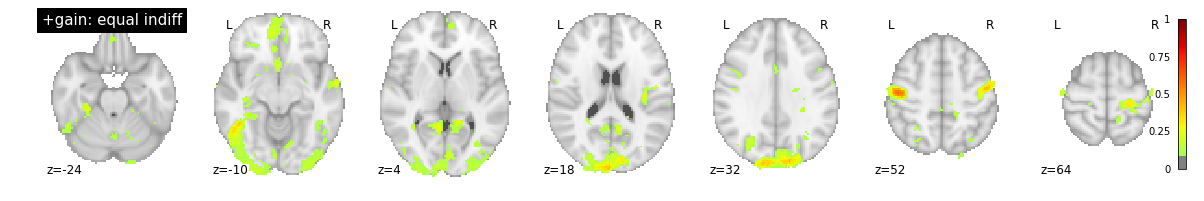

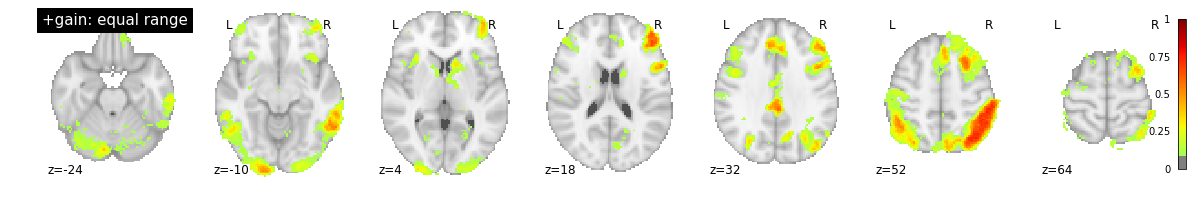

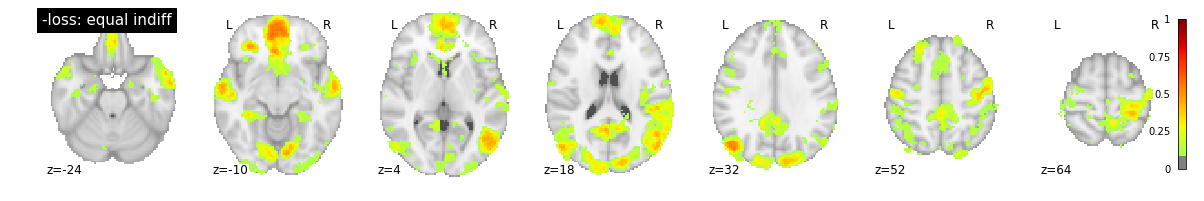

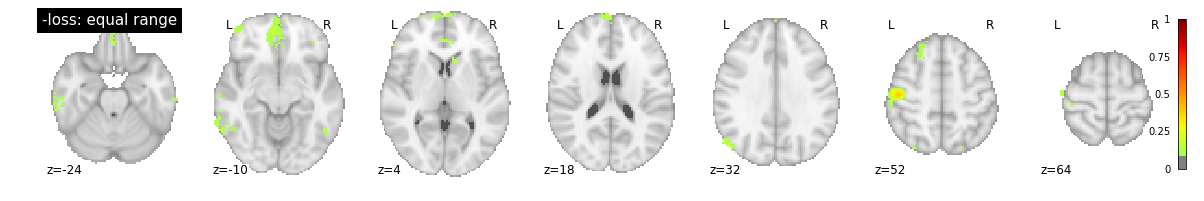

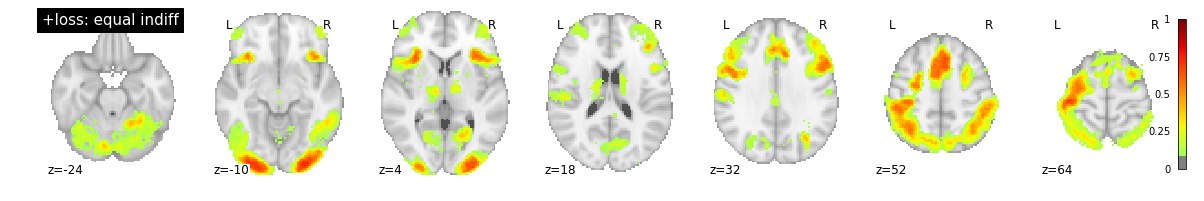

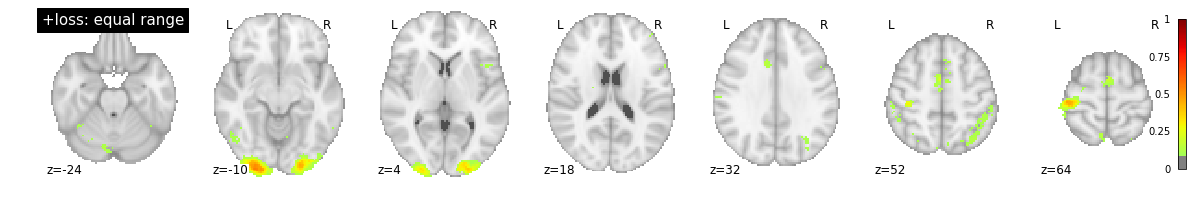

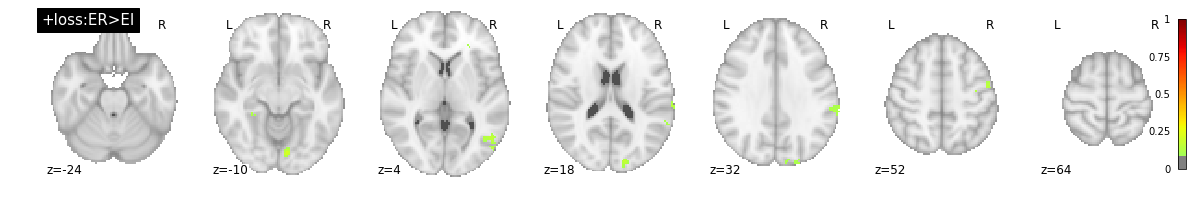

In [5]:
# display overlap maps for thresholded maps

cut_coords = [-24,-10,4,18,32,52,64]
for hyp in [1,2,5,6,7,8,9]:
    img=os.path.join(output_dir,'thresh_mean/hypo%d.nii.gz'%hyp)
    nilearn.plotting.plot_stat_map(img, threshold=0.1, display_mode="z", 
                colorbar=True,title=hypotheses[hyp],vmax=1.,cmap='jet',
                                  cut_coords = cut_coords)


#### Range and variance maps

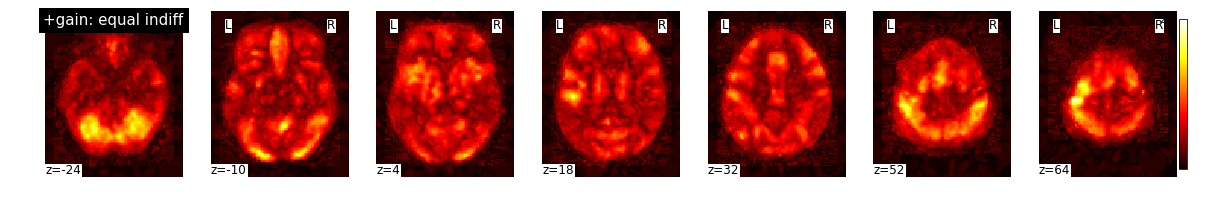

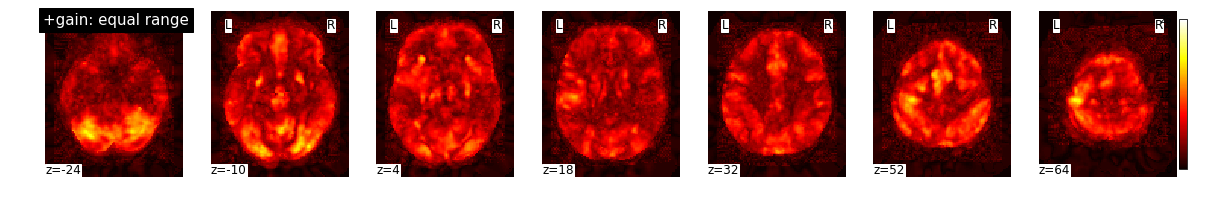

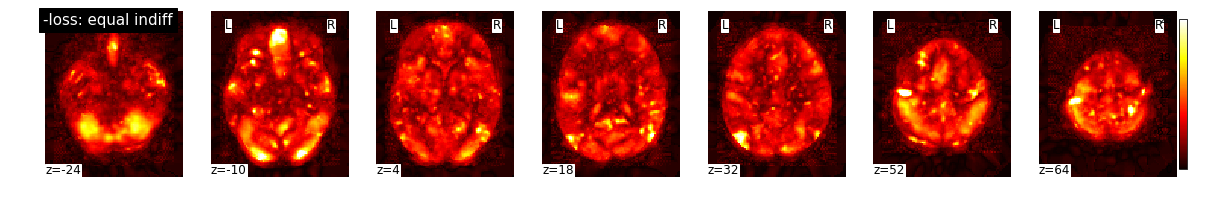

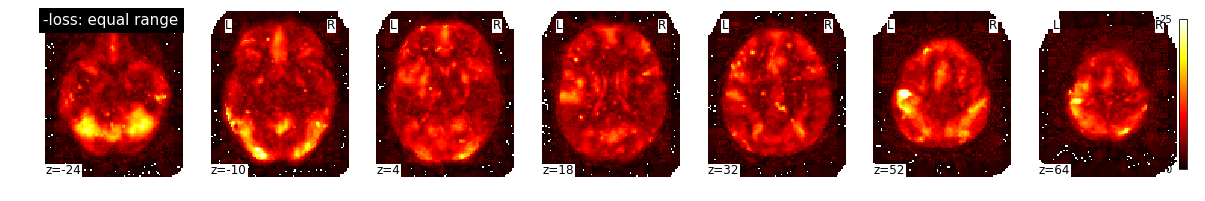

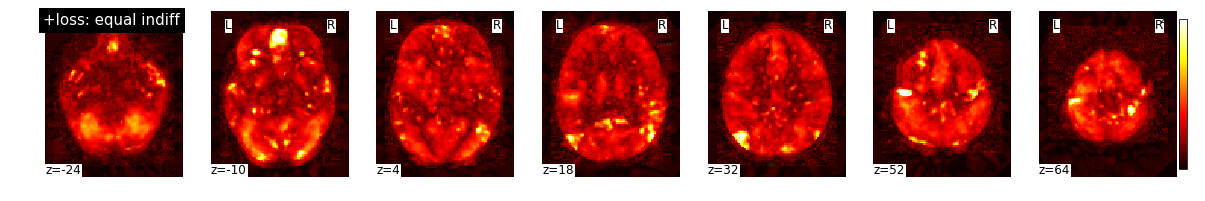

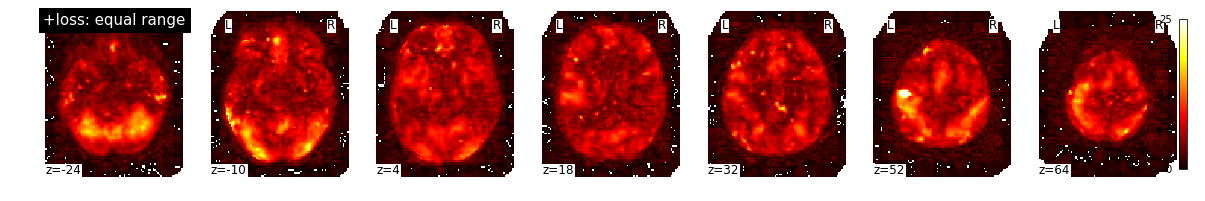

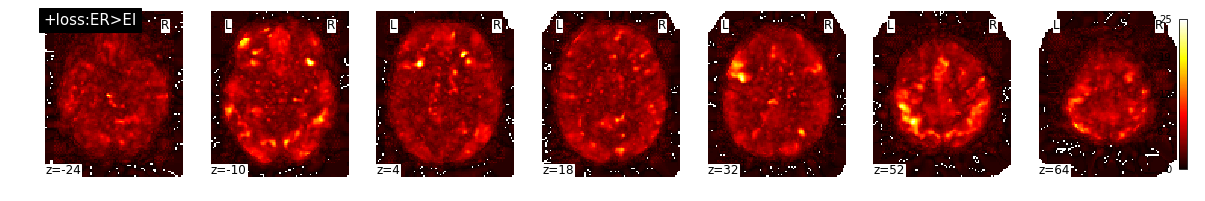

In [6]:
# show range maps
for hyp in [1,2,5,6,7,8,9]:
    range_img=nibabel.load(os.path.join(output_dir,'unthresh_range/hypo%d.nii.gz'%hyp))
    nilearn.plotting.plot_stat_map(range_img, threshold=.1, display_mode="z", 
                           colorbar=True,title=hypotheses[hyp],vmax=25,
                                  cut_coords = cut_coords)


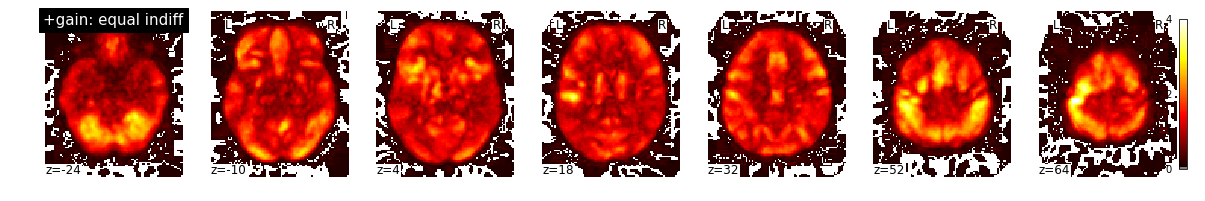

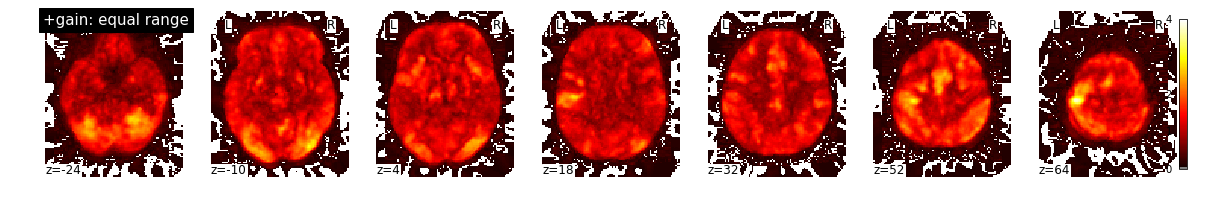

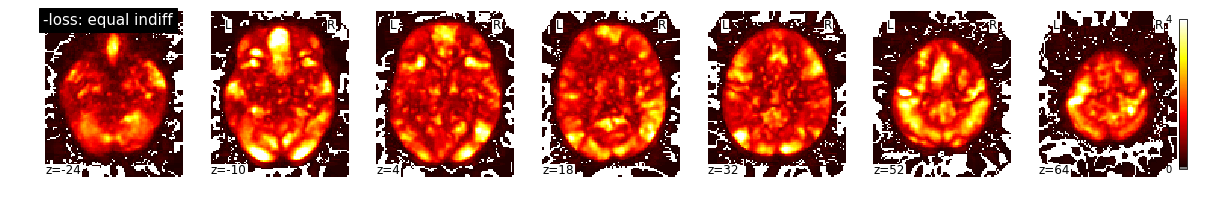

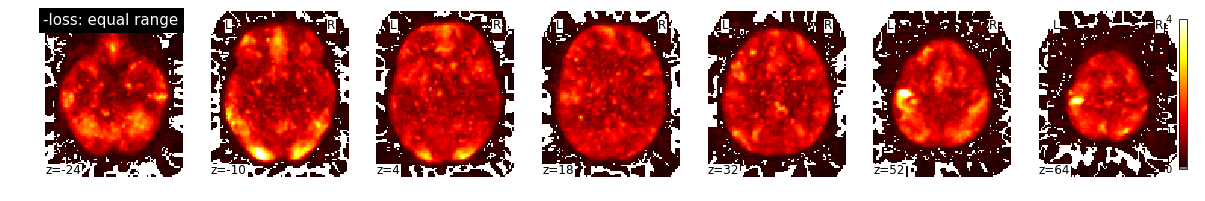

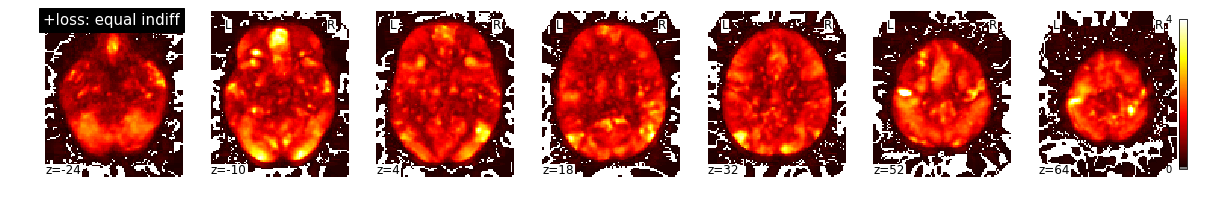

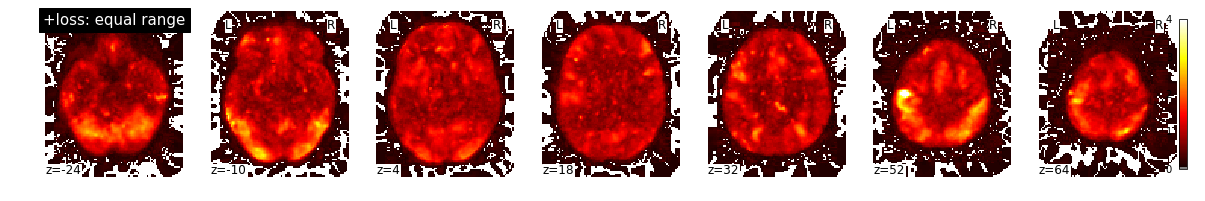

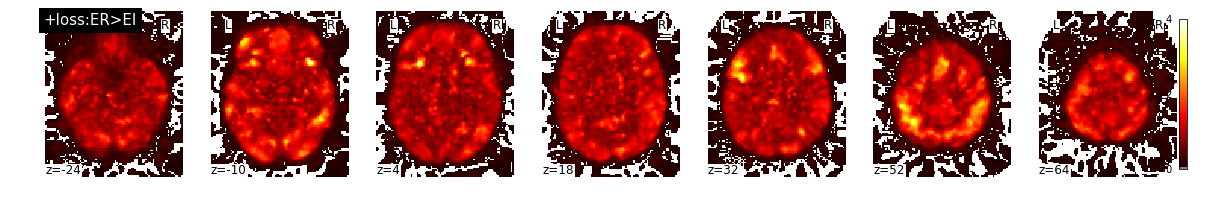

In [8]:
# show std maps
for hyp in [1,2,5,6,7,8,9]:
    std_img=nibabel.load(os.path.join(output_dir,'unthresh_std/hypo%d.nii.gz'%hyp))
    nilearn.plotting.plot_stat_map(std_img, threshold=.1, display_mode="z", 
                           colorbar=True,title=hypotheses[hyp],vmax=4,cut_coords = cut_coords)


#### Display unthresholded maps 

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


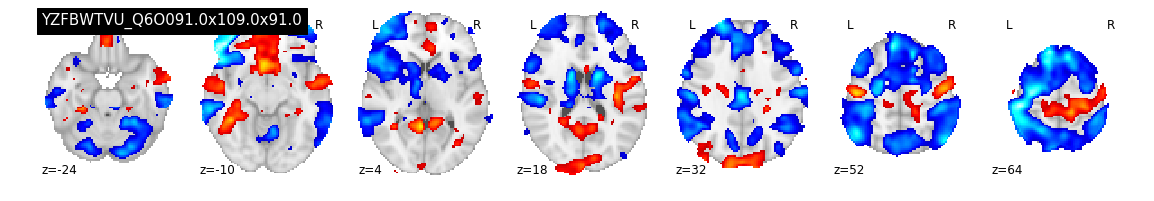

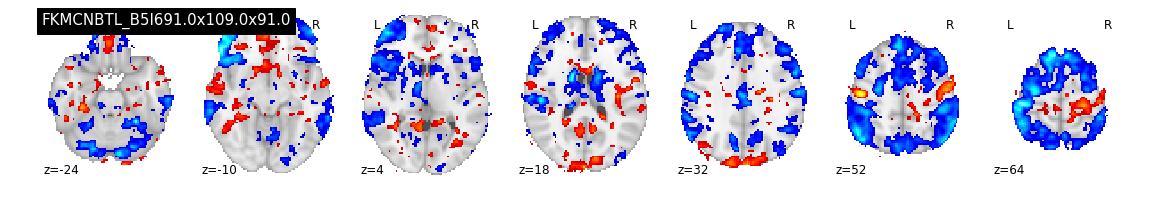

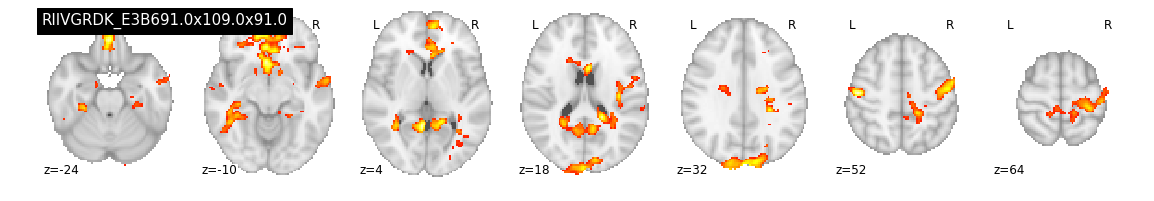

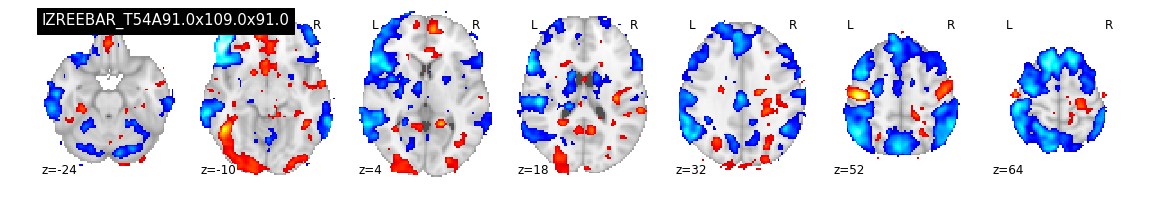

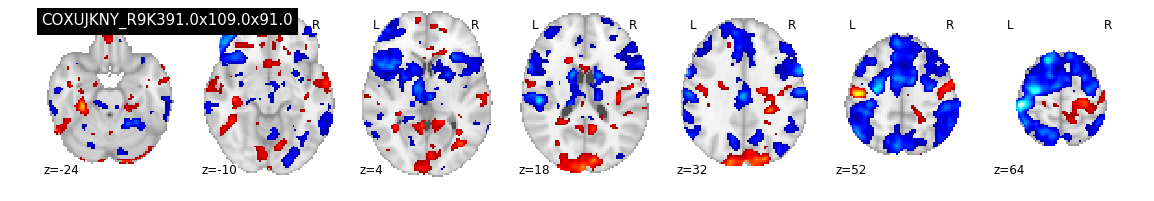

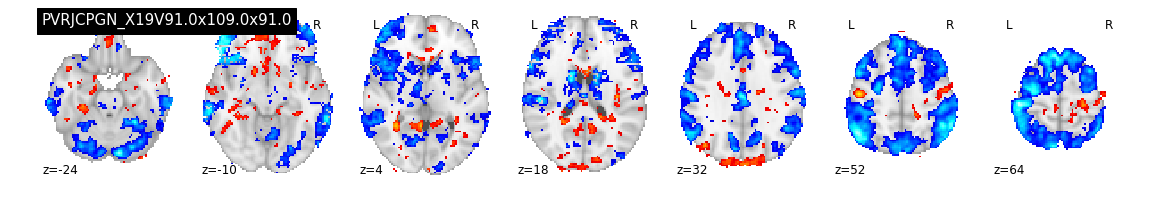

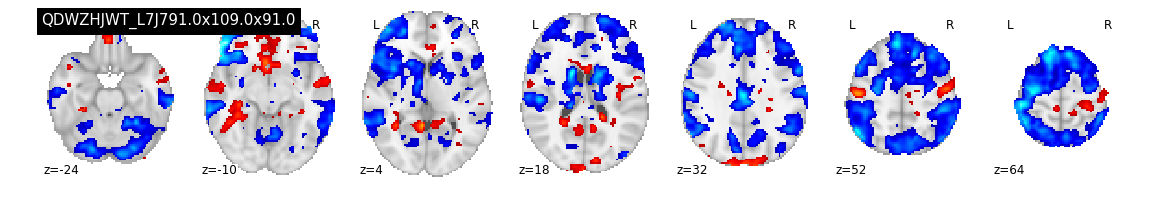

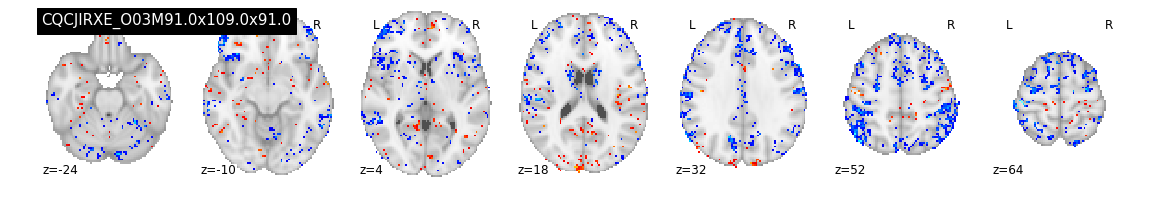

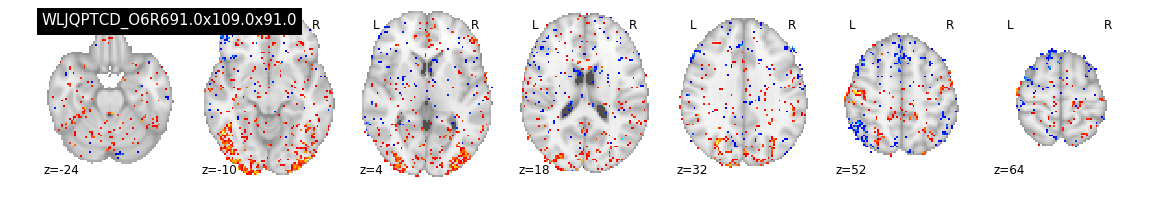

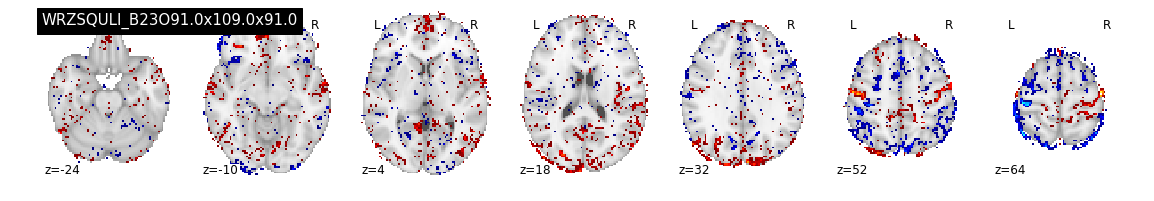

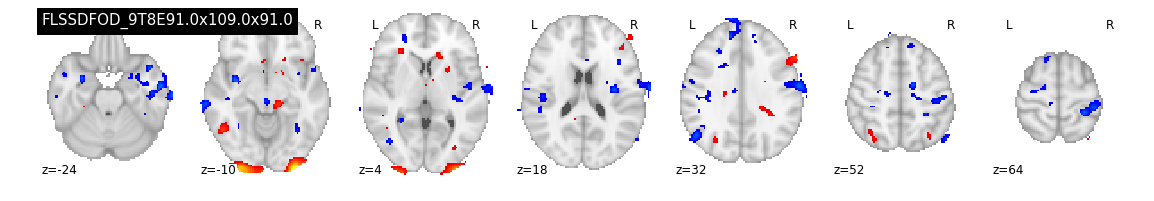

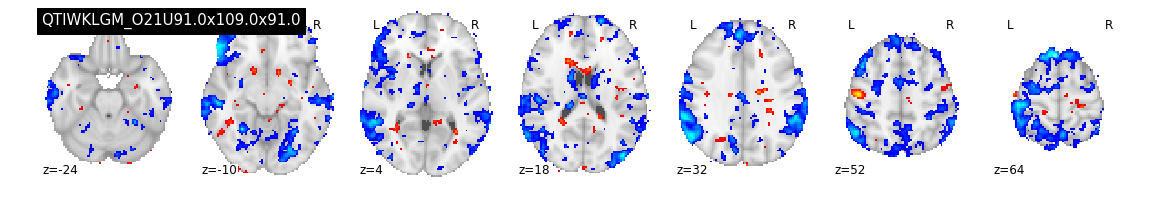

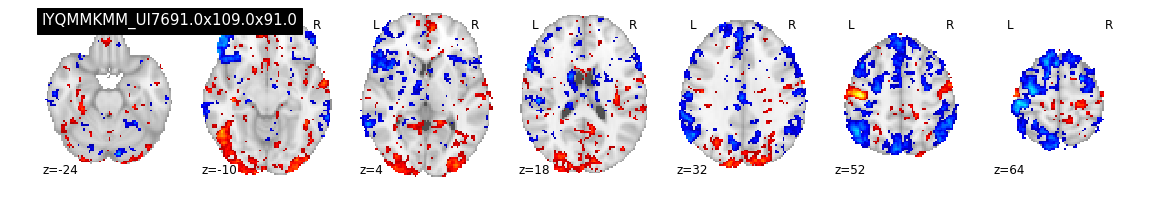

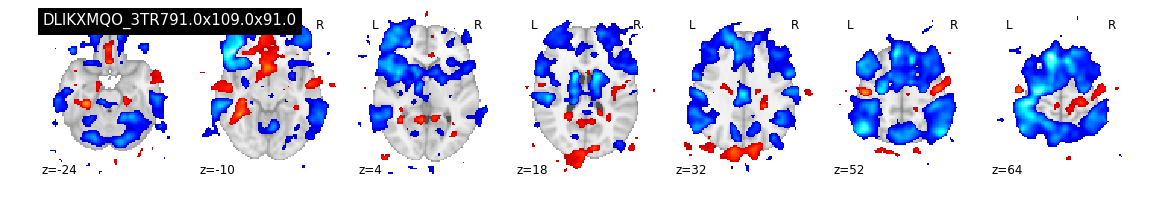

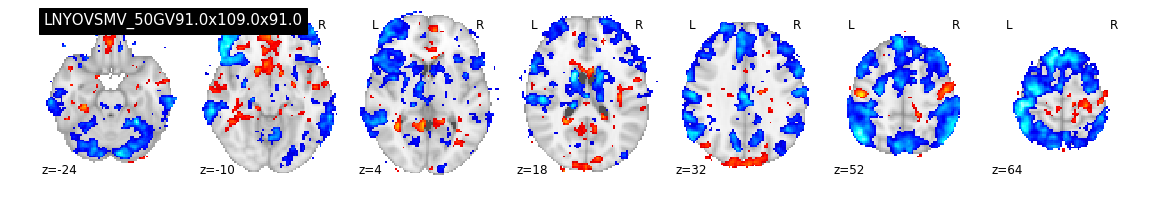

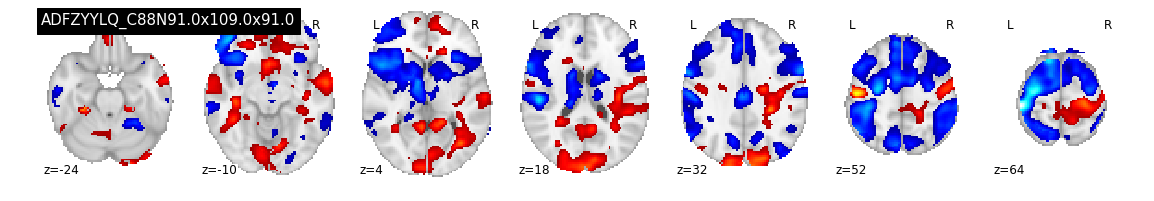

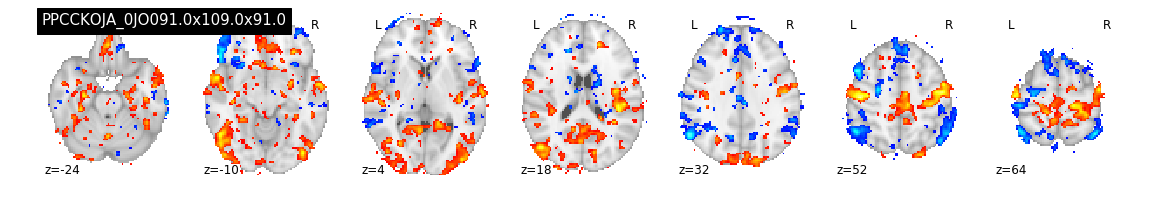

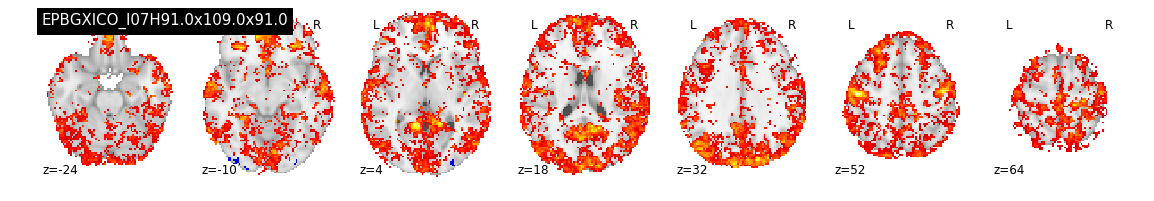

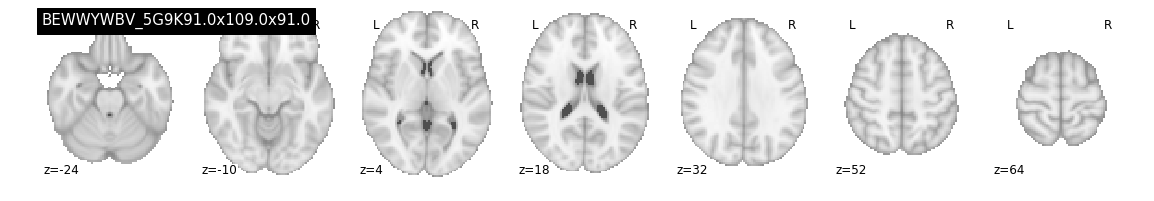

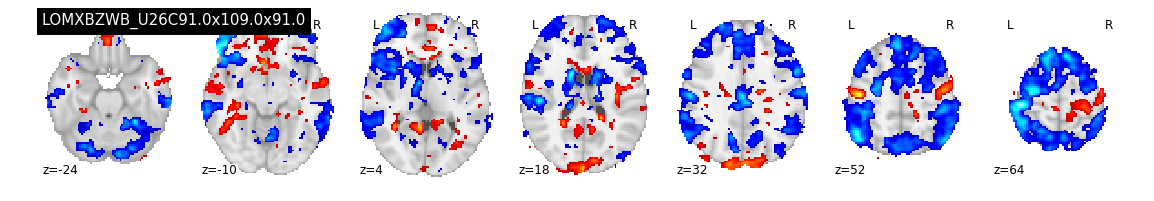

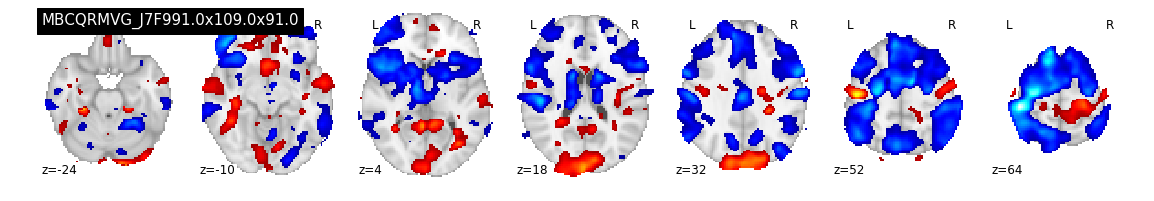

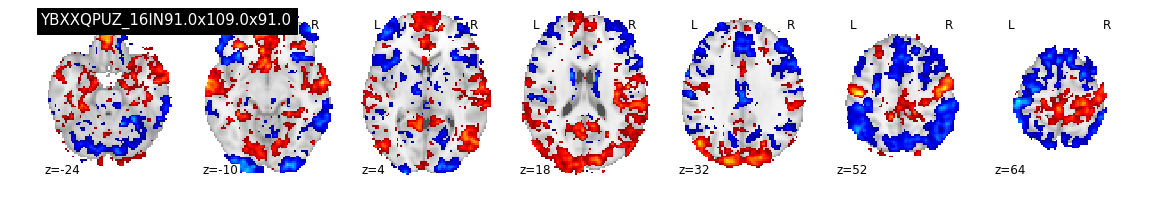

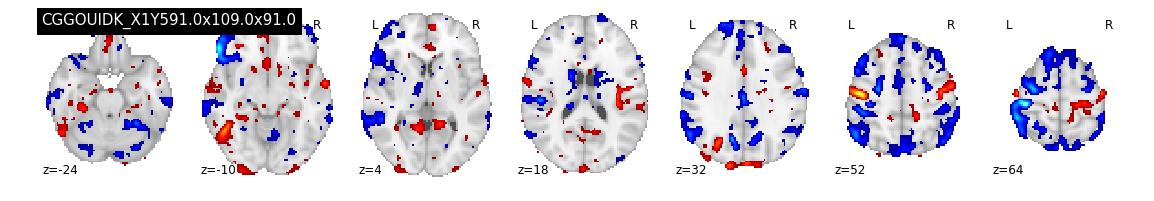

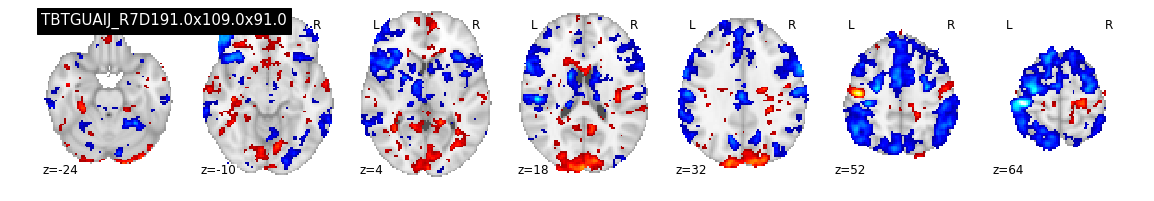

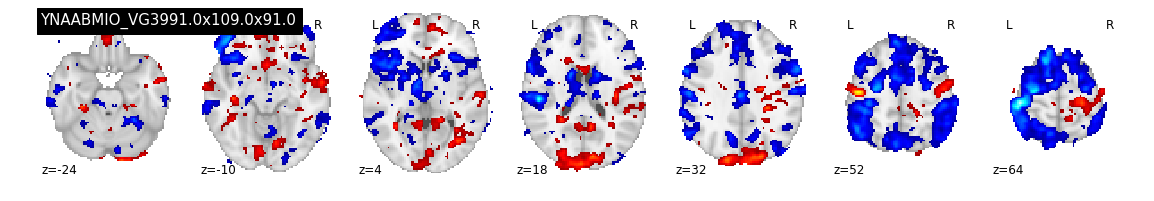

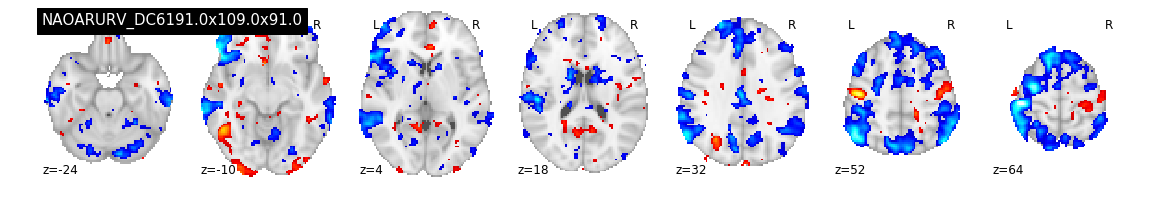

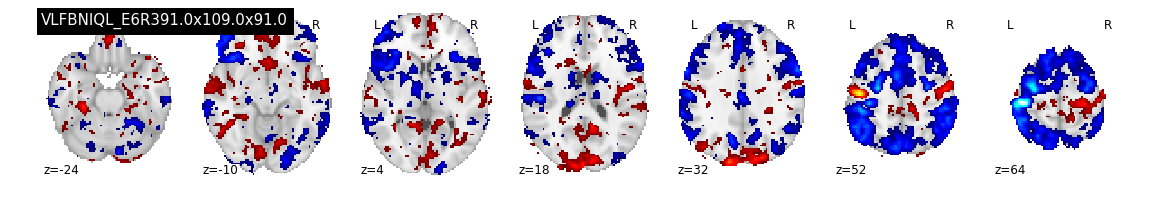

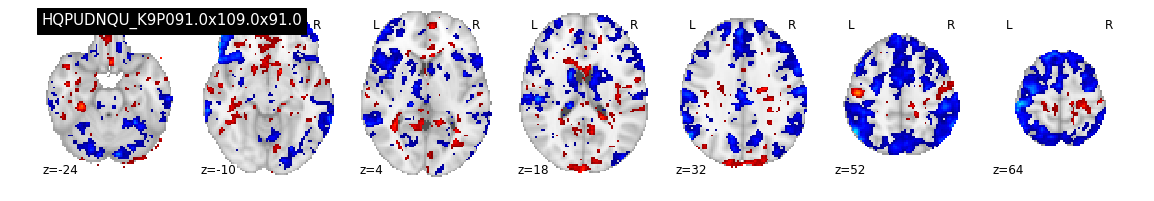

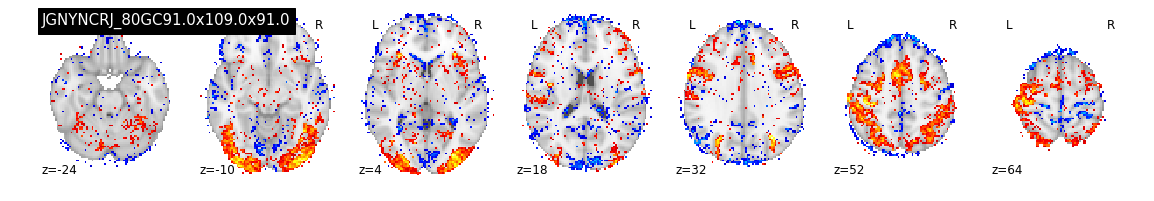

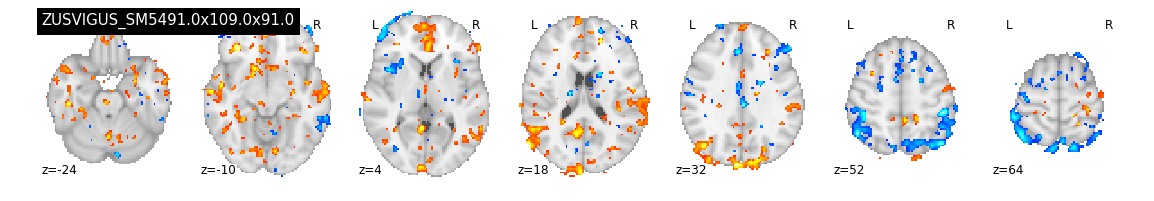

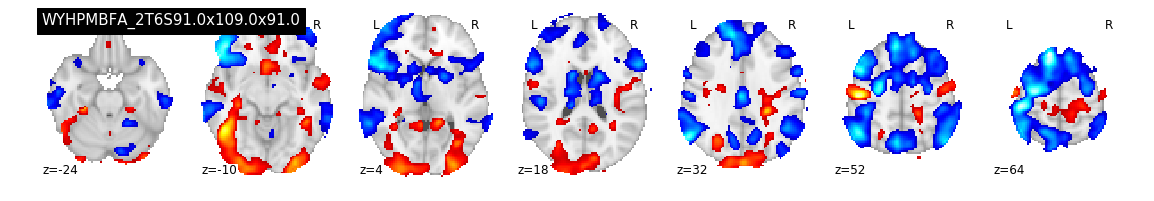

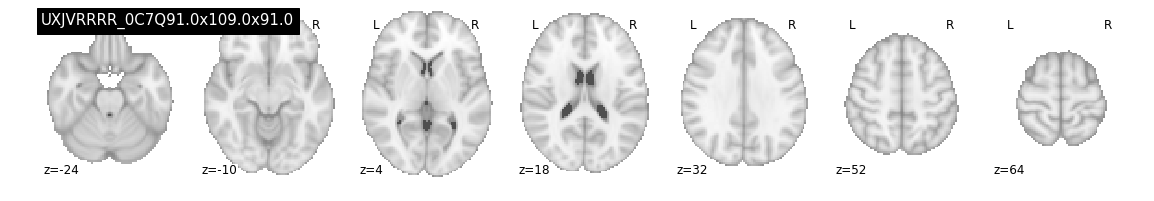

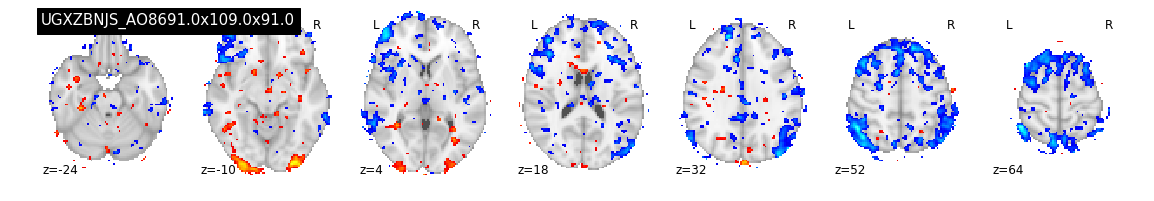

In [10]:
imgtype='unthresh'
imginfo = {}
plot_data=True
use_fmriprep_only=True
show_md = False
nnz = []
nonzero_volume = []

dim_values = []
missing_metadata = []

for hyp in range(1,2):
    hmaps = glob.glob(os.path.join(output_dir,'resampled/*/hypo%d_unthresh.nii.gz'%hyp))
    
    # load all maps and get dims
    for m in hmaps:
        img = nibabel.load(m)
        collection = m.split('/')[-2]
        collection_string,teamID = collection.split('_')
        dims = img.header.get_data_shape()
        dim_values.append(dims)
        
        md = metadata.query('NV_collection_string == "%s"'%collection_string)
        if md.shape[0]==0:
            # try other identifier
            md = metadata.query('teamID == "%s"'%teamID)
            if md.shape[0]==0:
                missing_metadata.append(collection)
                continue
        if use_fmriprep_only:
            if not md['used_fmriprep_data'].values[0].find('Yes')>-1:
                continue
            # also check space
            #if not ((numpy.prod(dims)==903555) and 
            #        (numpy.abs(numpy.prod(numpy.diag(img.header.get_qform())))==8)):
            #    continue
        qform = img.header.get_qform()
        #print(m)
        #print()
        #print(qform)
        # check for thresholding
        imgdata=img.get_data()
        nonzero_vox = numpy.nonzero(imgdata)
        n_nonzero_vox = len(nonzero_vox[0])
        nnz.append(n_nonzero_vox)
        vox_vol = numpy.prod(dims)
        nonzero_volume.append(n_nonzero_vox*vox_vol)
        #print(collection,dims, numpy.prod(dims),n_nonzero_vox*vox_vol)
        if show_md:
            print(md['inter_subject_reg'].values)
        if plot_data:
            nilearn.plotting.plot_stat_map(img, threshold=2., display_mode="z", 
                           colorbar=False,title=collection+'x'.join(['%0.1f'%i for i in dims[:3]]),
                                          cut_coords = cut_coords)
        
    #combined_img = nilearn.image.concat_imgs(hmaps)
    #combined_img.to_filename(os.path.join(output_dir,'thresh/hypo%d_combined_fmriprep.nii.gz'%hyp))

#### Dimensionality reduction

In [11]:
# load all images for hypothesis 1 and perform tsne

def get_masked_data(hyp,imgtype='unthresh'):
    if imgtype == 'unthresh':
        hmaps = glob.glob(os.path.join(output_dir,'resampled/*/hypo%d_unthresh.nii.gz'%hyp))
    else:
         hmaps = glob.glob(os.path.join(output_dir,'resampled/*/hypo%d_thresh.nii.gz'%hyp))
       
    combined_data = nilearn.image.concat_imgs(hmaps)
    masker = nilearn.input_data.MultiNiftiMasker(mask_img=os.path.join(output_dir,'templates/MNI152_T1_2mm_brain_mask.nii.gz'))
    maskdata=masker.fit_transform(combined_data)   
    maskdata = numpy.nan_to_num(maskdata)
    if imgtype=='thresh':
        maskdata = (maskdata>1e-6).astype('float')
    labels = [os.path.basename(os.path.dirname(i)).split('_')[1] for i in hmaps]
    return(maskdata,labels)
    

In [13]:
def run_dimensionality_reduction(maskdata):
    tsne = sklearn.manifold.TSNE()
    tsne_fit = tsne.fit_transform(maskdata)
    mds = sklearn.manifold.MDS()
    mds_fit = mds.fit_transform(maskdata)
    returm(tsne_fit,mds_fit)

In [ ]:
#plt.scatter(tsne_fit[:,0],tsne_fit[:,1])

In [ ]:
#plt.scatter(mds_fit[:,0],mds_fit[:,1])

#### Correlation maps for unthresholded images

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:301: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.memory_level == 0 and self.memory.cachedir is not None:
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


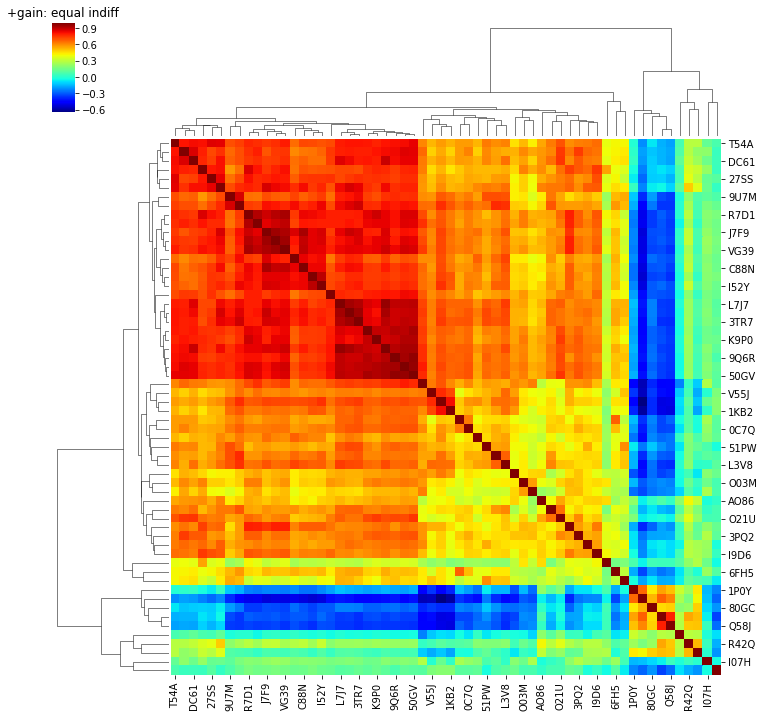

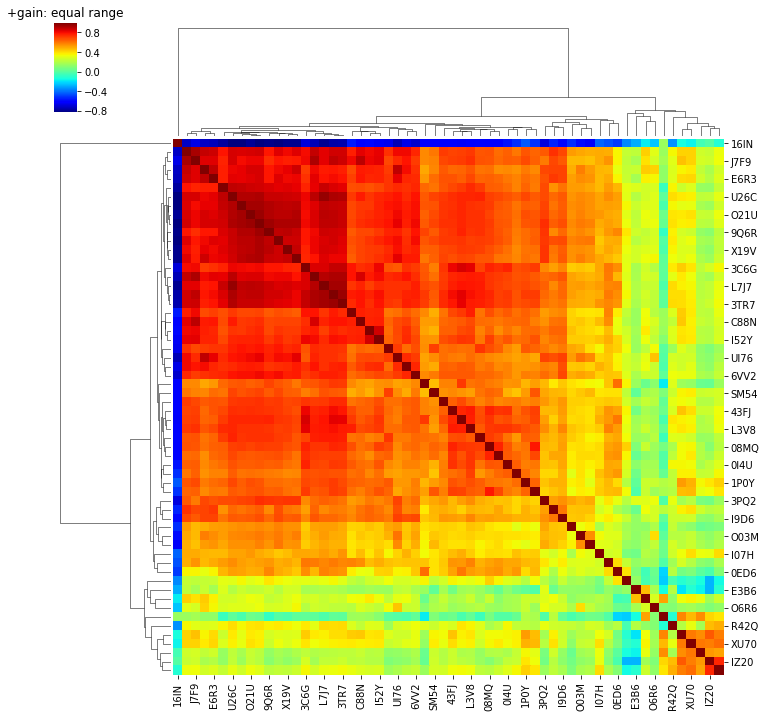

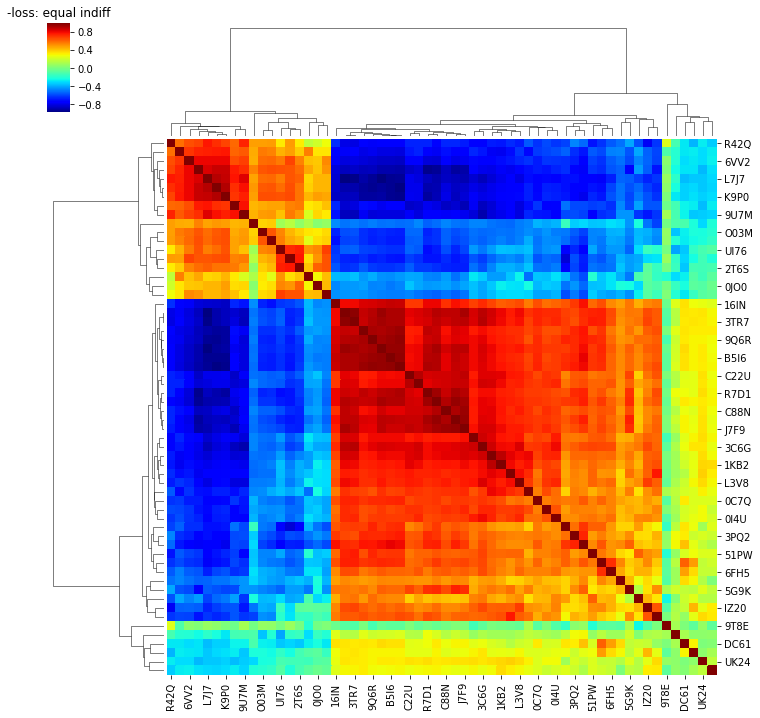

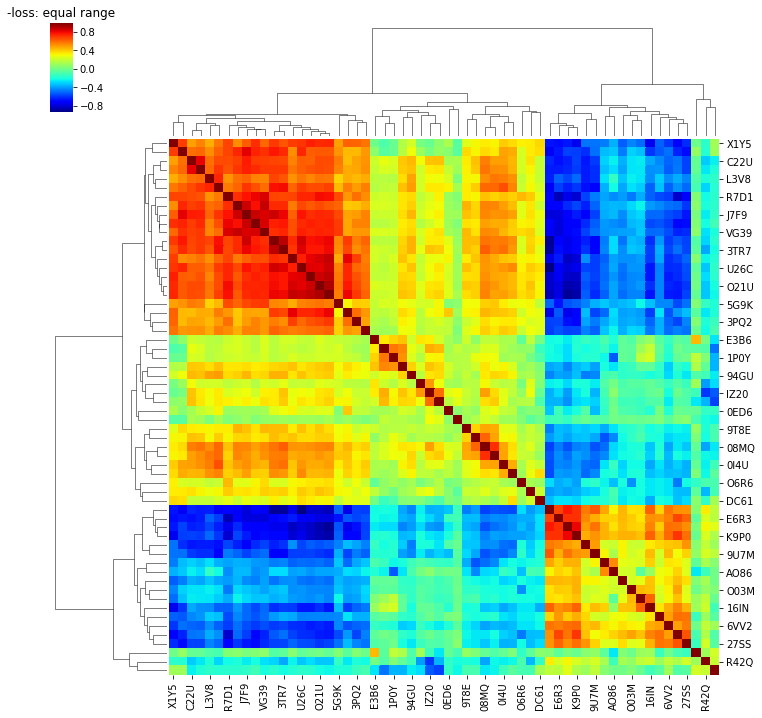

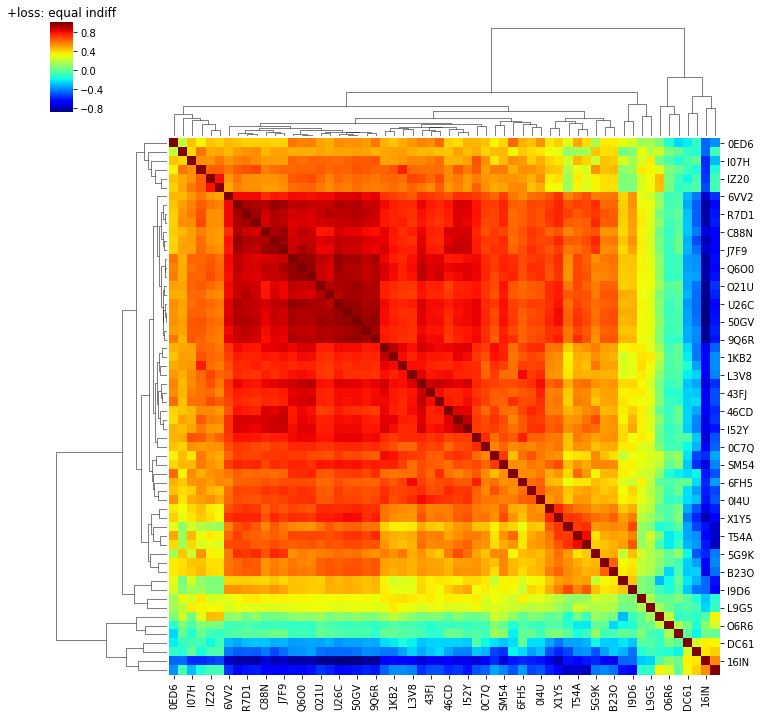

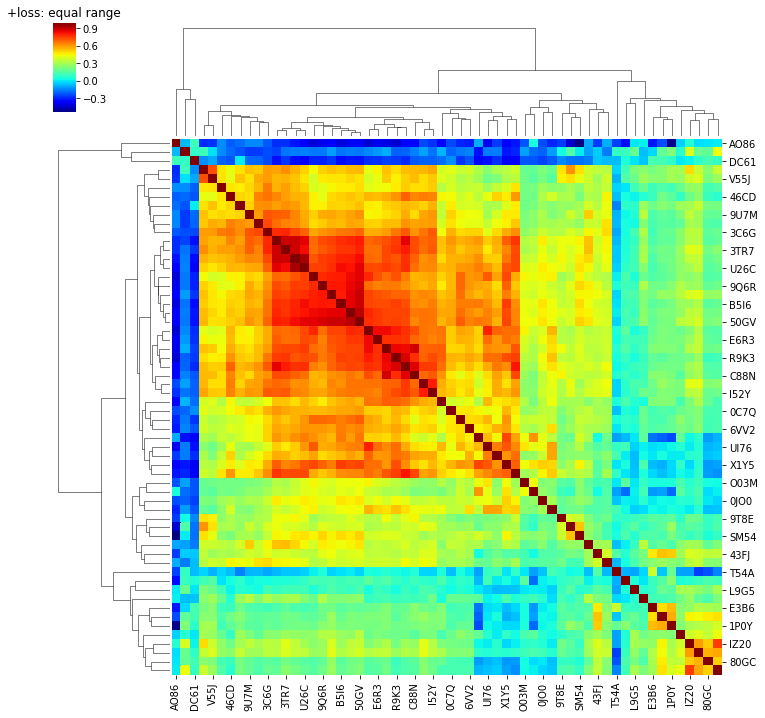

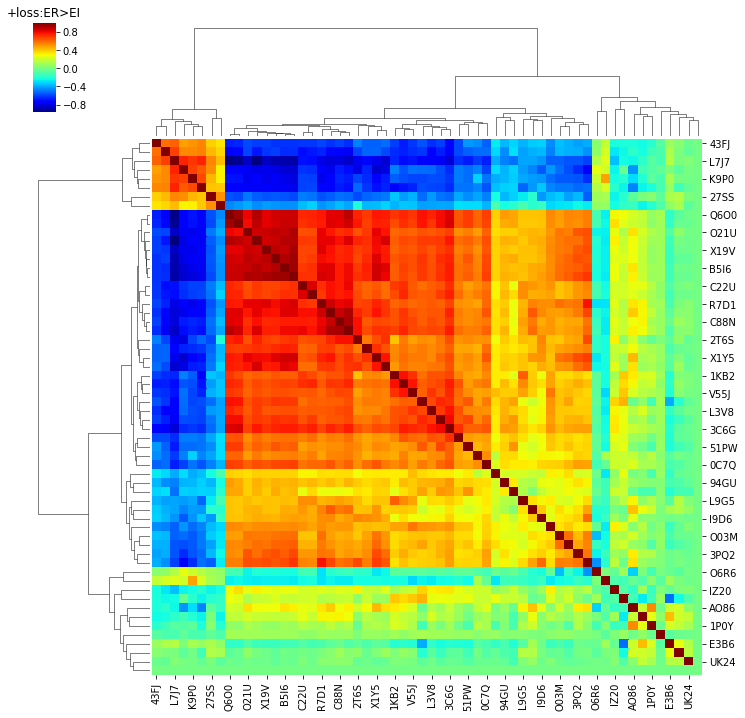

In [14]:
cc_unthresh={}
for hyp in [1,2,5,6,7,8,9]:
    maskdata,labels = get_masked_data(hyp)

    cc = numpy.corrcoef(maskdata)
    cc = numpy.nan_to_num(cc)
    df = pandas.DataFrame(cc,index=labels,columns=labels)
    seaborn.clustermap(df,cmap='jet',figsize=(12,12))
    plt.title(hypotheses[hyp])
    cc_unthresh[hyp]=(cc,labels)

#### Similarity maps for thresholded images (Jaccard)

In [15]:
import sklearn.metrics
def matrix_jaccard(mtx):
    jacmtx = numpy.zeros((mtx.shape[0],mtx.shape[0]))
    for i in range(mtx.shape[0]):
        for j in range(i+1,mtx.shape[0]):
            if i==j:
                 continue
            if numpy.sum(mtx[i,:])>0 and numpy.sum(mtx[j,:])>0:
                jacmtx[i,j]=sklearn.metrics.jaccard_score(mtx[i,:],mtx[j,:]) 
    
    jacmtx = numpy.nan_to_num(jacmtx)
    jacmtx = jacmtx + jacmtx.T
    jacmtx[numpy.diag_indices_from(jacmtx)]=1
    return(jacmtx)



In [ ]:
cc_thresh={}
for hyp in [1,2,5,6,7,8,9]:
    maskdata,labels = get_masked_data(hyp,imgtype='thresh')

    cc = matrix_jaccard(maskdata)
    df = pandas.DataFrame(cc,index=labels,columns=labels)
    seaborn.clustermap(df,cmap='jet',figsize=(12,12))
    plt.title(hypotheses[hyp])
    cc_thresh[hyp]=cc
    

In [ ]:
# how is it that VMPFC agreement is so good for negative loss but not for positive gain?


In [ ]:
# compute map similarity for fmriprep studies versus others

for hyp in [1]:
    cc,labels = cc_unthresh[hyp]
    